In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import utils, models
import argparse

utils.SetStyle()
tf.random.set_seed(1234)

plot_folder='../plots'
num_dim=2
num_epoch = 10
lr = 1e-3

import os

/clusterfs/ml4hep/shahzar/reweighting-schemes/normalizing-flows/utils.py:129: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  hep.set_style(hep.style.CMS)


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # pick a number < 4 on ML4HEP; < 3 on Voltan 
#physical_devices = tf.config.list_physical_devices('GPU') 
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

# 2D Gaussians

Generate training & validation samples (2D Gaussians):

In [3]:
train_b, train_s, train_cdf_b, train_cdf_s, train_tanh_b, train_tanh_s = utils.DataGenerator(num_dim=num_dim)
val_b, val_s, val_cdf_b, val_cdf_s, val_tanh_b, val_tanh_s = utils.DataGenerator(num_dim=num_dim)

Plot the input distributions:

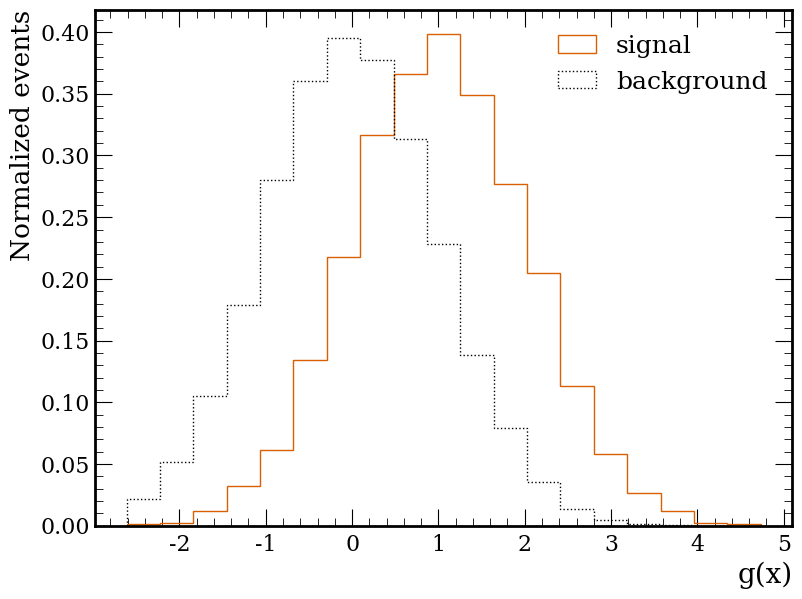

In [4]:
feed_dict={
    'signal':val_s[:,0],
    'background':val_b[:,0],
}

fig,ax = utils.HistRoutine(feed_dict,plot_ratio=False,
                           xlabel='g(x)',
                           ylabel='Normalized events',
                           reference_name='signal')


fig.savefig('{}/{}.pdf'.format(plot_folder,"Hist1D_gauss"))

Train the normalizing flow model (FFJORD) on the different transformations of the input data:

In [5]:
models.FFJORD(train_b,'checkpoint_Flow_gaus',
              lr=lr,max_epoch = num_epoch)
#models.FFJORD(train_cdf_b,'checkpoint_Flow_cdf',
#              lr=lr,max_epoch = num_epoch)
#models.FFJORD(train_tanh_b,'checkpoint_Flow_tanh',
#              lr=lr,max_epoch = num_epoch)

2022-11-10 12:13:46.835490: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-10 12:13:46.835558: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: ml4hep1.lbl.gov
2022-11-10 12:13:46.835569: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: ml4hep1.lbl.gov
2022-11-10 12:13:46.835663: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 460.32.3
2022-11-10 12:13:46.835709: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 460.32.3
2022-11-10 12:13:46.835718: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 460.32.3
2022-11-10 12:13:46.835983: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU in

Epoch 1/10
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))
1/8 [==>...........................] - ETA: 2:32 - loss: 3.1249

2022-11-10 12:14:08.860996: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at variable_ops.cc:119 : Already exists: Resource __per_step_0/StatefulPartitionedCall/StatefulPartitionedCall_1/gradients/chain_of_ffjord_of_ffjordMultivariateNormalDiag/log_prob/chain_of_ffjord_of_ffjord/inverse/ffjord/inverse/IdentityN_grad/dormand_princeGradients/while/body/_2016/gradients/chain_of_ffjord_of_ffjordMultivariateNormalDiag/log_prob/chain_of_ffjord_of_ffjord/inverse/ffjord/inverse/IdentityN_grad/dormand_princeGradients/while/dormand_prince/while/body/_5623/gradients/chain_of_ffjord_of_ffjordMultivariateNormalDiag/log_prob/chain_of_ffjord_of_ffjord/inverse/ffjord/inverse/IdentityN_grad/dormand_princeGradients/while/dormand_prince/while/advance_to_solution_time/while/body/_9134/gradient_tape/gradients/chain_of_ffjord_of_ffjordMultivariateNormalDiag/log_prob/chain_of_ffjord_of_ffjord/inverse/ffjord/inverse/IdentityN_grad/dormand_princeGradients/while/dormand_prince/while/advance_

AlreadyExistsError:  Resource __per_step_0/StatefulPartitionedCall/StatefulPartitionedCall_1/gradients/chain_of_ffjord_of_ffjordMultivariateNormalDiag/log_prob/chain_of_ffjord_of_ffjord/inverse/ffjord/inverse/IdentityN_grad/dormand_princeGradients/while/body/_2016/gradients/chain_of_ffjord_of_ffjordMultivariateNormalDiag/log_prob/chain_of_ffjord_of_ffjord/inverse/ffjord/inverse/IdentityN_grad/dormand_princeGradients/while/dormand_prince/while/body/_5623/gradients/chain_of_ffjord_of_ffjordMultivariateNormalDiag/log_prob/chain_of_ffjord_of_ffjord/inverse/ffjord/inverse/IdentityN_grad/dormand_princeGradients/while/dormand_prince/while/advance_to_solution_time/while/body/_9134/gradient_tape/gradients/chain_of_ffjord_of_ffjordMultivariateNormalDiag/log_prob/chain_of_ffjord_of_ffjord/inverse/ffjord/inverse/IdentityN_grad/dormand_princeGradients/while/dormand_prince/while/advance_to_solution_time/while/runge_kutta_step/value_and_gradient/map/while/gradients/chain_of_ffjord_of_ffjordMultivariateNormalDiag/log_prob/chain_of_ffjord_of_ffjord/inverse/ffjord/inverse/IdentityN_grad/dormand_princeGradients/while/dormand_prince/while/advance_to_solution_time/while/runge_kutta_step/value_and_gradient/map/while_grad/body/_13441/gradient_tape/gradients/chain_of_ffjord_of_ffjordMultivariateNormalDiag/log_prob/chain_of_ffjord_of_ffjord/inverse/ffjord/inverse/IdentityN_grad/dormand_princeGradients/while/dormand_prince/while/advance_to_solution_time/while/runge_kutta_step/value_and_gradient/map/while/gradients/ArithmeticOptimizer/AddOpsRewrite_AddN_1/tmp_var/frame:14352235710318267309/iter:1/N10tensorflow19TemporaryVariableOp6TmpVarE
	 [[{{node StatefulPartitionedCall/StatefulPartitionedCall_1/gradients/chain_of_ffjord_of_ffjordMultivariateNormalDiag/log_prob/chain_of_ffjord_of_ffjord/inverse/ffjord/inverse/IdentityN_grad/dormand_princeGradients/while/body/_2016/gradients/chain_of_ffjord_of_ffjordMultivariateNormalDiag/log_prob/chain_of_ffjord_of_ffjord/inverse/ffjord/inverse/IdentityN_grad/dormand_princeGradients/while/dormand_prince/while/body/_5623/gradients/chain_of_ffjord_of_ffjordMultivariateNormalDiag/log_prob/chain_of_ffjord_of_ffjord/inverse/ffjord/inverse/IdentityN_grad/dormand_princeGradients/while/dormand_prince/while/advance_to_solution_time/while/body/_9134/gradient_tape/gradients/chain_of_ffjord_of_ffjordMultivariateNormalDiag/log_prob/chain_of_ffjord_of_ffjord/inverse/ffjord/inverse/IdentityN_grad/dormand_princeGradients/while/dormand_prince/while/advance_to_solution_time/while/runge_kutta_step/value_and_gradient/map/while/gradients/chain_of_ffjord_of_ffjordMultivariateNormalDiag/log_prob/chain_of_ffjord_of_ffjord/inverse/ffjord/inverse/IdentityN_grad/dormand_princeGradients/while/dormand_prince/while/advance_to_solution_time/while/runge_kutta_step/value_and_gradient/map/while_grad/body/_13441/gradient_tape/gradients/chain_of_ffjord_of_ffjordMultivariateNormalDiag/log_prob/chain_of_ffjord_of_ffjord/inverse/ffjord/inverse/IdentityN_grad/dormand_princeGradients/while/dormand_prince/while/advance_to_solution_time/while/runge_kutta_step/value_and_gradient/map/while/gradients/ArithmeticOptimizer/AddOpsRewrite_AddN_1/tmp_var}}]] [Op:__inference_train_function_21769]

Function call stack:
train_function


Calculate ROC curves:

In [ ]:
roc_curves = {}

fpr_gaus, tpr_gaus= models.FFJORD([],'checkpoint_Flow_gaus',[val_s,val_b],load=True)
roc_curves['Gaussian NF'] = [fpr_gaus, tpr_gaus]
fpr_cdf, tpr_cdf= models.FFJORD([],'checkpoint_Flow_cdf',[val_cdf_s,val_cdf_b],load=True)
roc_curves['CDF NF'] =[fpr_cdf, tpr_cdf]
fpr_tanh, tpr_tanh= models.FFJORD([],'checkpoint_Flow_tanh',[val_tanh_s,val_tanh_b],load=True)
roc_curves['tanh NF'] =[fpr_tanh, tpr_tanh]

Make plot of ROC curves:

In [ ]:
x = np.linspace(0,1,1000)

fig,gs = utils.SetFig("True positive rate","1 - Fake Rate") 
for plot in roc_curves:
    fpr,tpr = roc_curves[plot]
    plt.plot(tpr,1-fpr,label="{}".format(plot),
             color=utils.colors[plot],linestyle=utils.line_style[plot])
plt.plot(x,1-x,color='black',linestyle='-')
    
plt.ylim([-0.25, 1.1])
plt.legend(frameon=False,fontsize=12,ncol=3)
fig.savefig('{}/{}.png'.format(plot_folder,"ROC_gaus"))

# Physics data

https://zenodo.org/record/3548091#.Yr9ws-zMJhE

In [ ]:
mc = np.load("../../ATLASOmniFold/omnifold_data/Pythia21_Zjet_pTZ-200GeV_0.npz")
data = np.load("../../ATLASOmniFold/omnifold_data/Herwig_Zjet_pTZ-200GeV_0.npz")

In [ ]:
mc.files

In [ ]:
mc['gen_jets'].shape

In [ ]:
mc_jet_pt_gen =  mc['gen_jets'][:,0]
mc_jet_eta_gen = mc['gen_jets'][:,1]
mc_jet_phi_gen = mc['gen_jets'][:,2]
mc_jet_m_gen =   mc['gen_jets'][:,3]

mc_jet_pt_sim =  mc['sim_jets'][:,0]
mc_jet_eta_sim = mc['sim_jets'][:,1]
mc_jet_phi_sim = mc['sim_jets'][:,2]
mc_jet_m_sim =   mc['sim_jets'][:,3]

In [ ]:
plt.figure(dpi=100, figsize=(6,4))
bins = np.linspace(0,1000,100)
plt.hist(mc_jet_pt_gen, bins=bins, alpha=0.5, label="Particle-Level");
plt.hist(mc_jet_pt_sim, bins=bins, alpha=0.5, label="Detector-Level");
plt.legend();
plt.xlabel(r'Jet $p_T$ [GeV]');
plt.ylabel('Counts');

In [ ]:
feed_dict={
    'signal':mc_jet_pt_gen,
    'background':mc_jet_pt_sim,
}

fig,ax = utils.HistRoutine(feed_dict,plot_ratio=False,
                           xlabel='g(x)',
                           ylabel='Normalized events',
                           reference_name='signal')


fig.savefig('{}/{}.pdf'.format(plot_folder,"Hist1D_physics"))

In [ ]:
phys_data_gen = np.vstack([mc_jet_phi_gen, mc_jet_eta_gen]).T
phys_data_sim = np.vstack([mc_jet_phi_sim, mc_jet_eta_sim]).T

In [ ]:
models.FFJORD(phys_data_gen,'checkpoint_Flow_physics',
              ndim=2,
              lr=lr,
              max_epoch = 100)

In [ ]:
roc_curves = {}

fpr_phys, tpr_phys = models.FFJORD([],'checkpoint_Flow_physics',[phys_data_gen, phys_data_sim],load=True)
roc_curves['Physics NF'] = [fpr_phys, tpr_phys]

In [ ]:
x = np.linspace(0,1,1000)

fig,gs = utils.SetFig("True positive rate","1 - Fake Rate") 
for plot in roc_curves:
    fpr,tpr = roc_curves[plot]
    plt.plot(tpr,1-fpr,label="{}".format(plot),
             color='magenta',linestyle='-')
plt.plot(x,1-x,color='black',linestyle='-')
    
plt.ylim([-0.25, 1.1])
plt.legend(frameon=False,fontsize=12,ncol=3)
fig.savefig('{}/{}.png'.format(plot_folder,"ROC_phys"))